# Modelo exponencial


   $$	
   \begin{cases}
   \frac{dV}{dt} = a_0 V &\ t ≤ \tau &\\
   \frac{dV}{dt} = a_1 &\ t > \tau &\\
   V(t=0)=V_0
   \end{cases}
   $$

Siendo 
$$ \tau = \frac{1}{a_0}log(\frac{a_1}{a_0 V_0})$$

Donde:
- $T_C$: es la longitud constante del ciclo celular o la longitud media del ciclo celular bajo el supuesto de una distribución exponencial de las longitudes del ciclo celular.
- $a_0$ caracteriza la fase exponencial.
- $a_1$ caracteriza la fase lineal.
- $V_0$ es el volumen inicial.
- $\tau$ es el umbral de volumen tumoral en el que el crecimiento del tumor cambia de exponencial a lineal.

Suponiendo que la solución del problema (1) es continuamente diferenciable:

A. $V_0 = 1 mm^3$ y sin fase lineal (a1 = +'), denominado en lo sucesivo exponencial 1. 

B. volumen inicial libre y sin fase lineal, denominado como exponencial V0.

C. Ecuación (1) con $V_0 = 1 mm^3$, denominada modelo exponencial-lineal.


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import math as m

In [2]:
a0, a1, V0, t, C1 = sp.symbols('a0 a1 V0 t C1')
psi = sp.symbols('psi', positive = True)
V = sp.Function('V')
Ve = sp.Function('Ve')

### 1. Modelo exponencial $V_0 = 1 mm^3$
Sin fase lineal $(a_1 = +∞)$

In [3]:
exponencial1 = sp.Eq(V(t).diff(), a0*V(t))
exponencial1

Eq(Derivative(V(t), t), a0*V(t))

In [4]:
solExp1 = sp.dsolve(exponencial1)
solExp1

Eq(V(t), C1*exp(a0*t))

In [5]:
resol1 = sp.Eq(V(t).subs(t,0).subs(V(0),1), solExp1.rhs.subs(t,0))
const1 = sp.solve(resol1, C1)
pto1 = solExp1.subs(C1, const1[0])
pto1

Eq(V(t), exp(a0*t))

#### Puntos críticos

In [6]:
pto_c1 = sp.solve(exponencial1.rhs, V(t))
pto_c1

[0]

In [7]:
pendiente1 = exponencial1.rhs.diff(V(t)).subs(V(t), pto_c1[0])
pendiente1

a0

### 2. Modelo exponencial $V_0$
Sin fase lineal $(a_1 = +∞)$ y con $V_0$ libre.

In [8]:
exponencial = sp.Eq(V(t).diff(),a0*V(t))
exponencial

Eq(Derivative(V(t), t), a0*V(t))

In [9]:
solExp = sp.dsolve(exponencial)
solExp

Eq(V(t), C1*exp(a0*t))

Calculo de $C_1$ para $t=0$

In [10]:
resol = sp.Eq(V(t).subs(t,0).subs(V(0),V0), solExp.rhs.subs(t,0))
const = sp.solve(resol, C1)
pto = solExp.subs(C1, const[0])
pto

Eq(V(t), V0*exp(a0*t))

Esta es la solución particular del modelo.

#### Puntos críticos

In [11]:
exponencial.rhs

a0*V(t)

In [12]:
pto_c = sp.solve(exponencial.rhs, V(t))
pto_c

[0]

In [13]:
pendiente = exponencial.rhs.diff(V(t)).subs(V(t), pto_c)
pendiente

a0

El comportamiento del modelo depende de $a_0$

### 3. Modelo exponencial-lineal

Un modelo descrito por estas ecuaciones diferenciales describe el crecimiento del tumor pero, por razones computacionales, es conveniente utilizar una única función diferencial. Por lo que a partir de aquí usaremos la ecuación: 
$$
\frac{dV}{dt} = \frac{a_0 V(t)}{[1+ (\frac{a_0}{a_1} V(t))^\psi]^\frac{1}{\psi}}
$$

Mientras el volumen del tumor sea menor que $\tau$ el término $(\frac{a_0 V(t)}{a_1})^\psi$ es despreciable en comparación con 1. Así que la tasa de crecimiento se aproxima:
$$
\frac{dV}{dt} = a_0 V(t)
$$
Es decir, se aproxima a un crecimiento exponencial.

Por el contrario, cuando el volumen del tumor es mayor que $\tau$ se puede despreciar 1, por lo tanto la tasa de crecimiento pasa a ser:
$$
\frac{dV}{dt} = \frac{a_0 V(t)}{\frac{a_0 V(t)}{a_1}}
$$
Que se quedaría en: 
$$
\frac{dV}{dt} = a_1
$$
Crecimiento lineal.

Por lo tanto hay que tener en cuenta dos condiciones distintas, para un valor de volumen del tumor menor o igual a $\tau$ el crecimiento será exponencial y para un volumen del tumor mayor que $\tau$ el crecimiento será lineal. Esto conlleva que:
- Crecimiento exponencial : $V_0 = 1mm^3$
- Crecimiento lineal: $V_0 = \tau$ ya que $\tau$ es el máximo valor de V(t) para el que el crecimiento es exponencial y el primer valor de V(t) para el que el crecimiento es lineal.

In [14]:
exp_linA = sp.Eq(V(t).diff(), a0*V(t))
lineal = sp.Eq(V(t).diff(), a1)
exp_linA.rhs, lineal.rhs

(a0*V(t), a1)

#### 3.1 Exponencial

In [15]:
solE = sp.dsolve(exp_linA)
solE

Eq(V(t), C1*exp(a0*t))

In [16]:
resolE = sp.Eq(V(t).subs(t,0).subs(V(0),1), solE.rhs.subs(t,0))
constE = sp.solve(resolE, C1)
ptoE = solE.subs(C1, constE[0])
ptoE

Eq(V(t), exp(a0*t))

#### 3.2 Lineal

In [17]:
solL = sp.dsolve(lineal)
solL

Eq(V(t), C1 + a1*t)

In [18]:
resolL = sp.Eq(V(t).subs(t,0).subs(V(0),(1/a0)*sp.log(a1/(a0*1))), solL.rhs.subs(t,0))
constL = sp.solve(resolL, C1)
ptoL = solL.subs(C1, constL[0])
ptoL

Eq(V(t), a1*t + log(a1/a0)/a0)

#### Puntos críticos

In [19]:
pto_cE = sp.solve(exp_linA.rhs, V(t))
pto_cE

[0]

In [20]:
pto_cL = sp.solve(lineal.rhs, V(t))
pto_cL

[]

In [21]:
pendienteE = exp_linA.rhs.diff(V(t)).subs(V(t), pto_cE)
pendienteE

a0

In [22]:
pendienteL = lineal.rhs.diff(V(t)).subs(V(t), pto_cL)
pendienteL

0

Los puntos críticos indican ambas pendientes del modelo:
- Cuando el modelo es exponencial depende de $a_0$.
- Cuando el modelo es lineal no depende de ningún parámetro.
Este cambio ocurrirá en el umbral del volumen tumoral $\tau$ a partir del cual el crecimiento es lineal y antes del cual el crecimiento era exponencial.

### 3. Representación de las soluciones 

#### Modelo exponencial $V_0 = 1 mm^3$

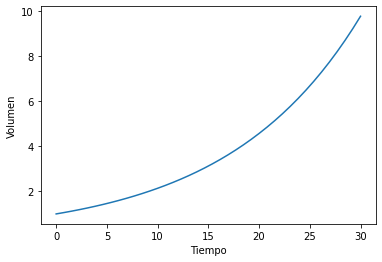

In [54]:
tiempo = np.linspace(0,30,40)
V0, a0 = 1, 0.076
V = V0*np.exp(a0*tiempo)
plt.plot(tiempo, V)
plt.xlabel("Tiempo")
plt.ylabel("Volumen")
plt.show()

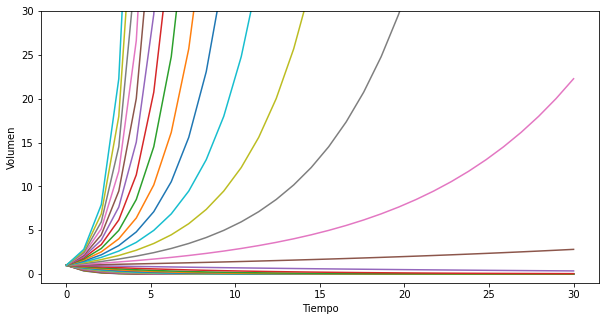

<Figure size 432x288 with 0 Axes>

In [87]:
t, a0, V0, C1 =sp.symbols('t a0 V0 C1')
plt.figure(figsize =(10,5))

# Generamos los valores de la variable independiente
t1 = np.linspace(0, 30, 30)
V1 = 1*sp.exp(a0*t)

for ini in np.linspace(-1, 1, 30):
    solp_l = sp.lambdify(t, V1.subs({V0:1, a0:ini}))
    plt.plot(t1, solp_l(t1))

#  Ponemos título a los ejes
plt.xlabel('Tiempo')
plt.ylabel('Volumen')
plt.ylim(-1,30)

# Mostramos la figura
plt.show()
plt.savefig('ModeloExpV0_1.png')

#### Modelo exponencial $V_0$

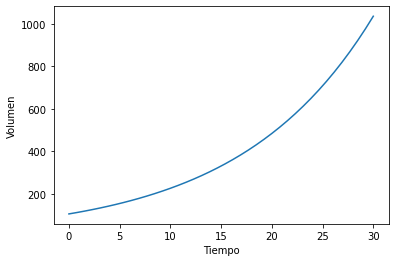

In [59]:
tiempo = np.linspace(0,30,40)
V0, a0 = 106, 0.076
V = V0*np.exp(a0*tiempo)
plt.plot(tiempo, V)
plt.xlabel("Tiempo")
plt.ylabel("Volumen")
plt.show()

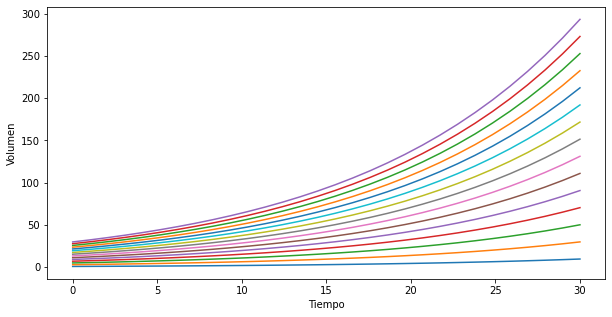

<Figure size 432x288 with 0 Axes>

In [88]:
t, a0, V0, C1 =sp.symbols('t a0 V0 C1')
plt.figure(figsize =(10,5))

# Generamos los valores de la variable independiente
t1 = np.linspace(0, 30, 30)
V1 = V0*sp.exp(a0*t)

for ini in np.linspace(1, 30, 15):
    solp_l = sp.lambdify(t, V1.subs({V0:ini, a0:0.076}))
    plt.plot(t1, solp_l(t1))

#  Ponemos título a los ejes
plt.xlabel('Tiempo')
plt.ylabel('Volumen')

# Mostramos la figura
plt.show()
plt.savefig('ModeloExpV0.png')

#### Modelo exponencial-lineal

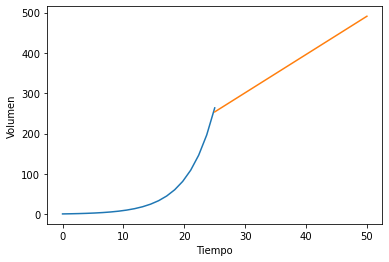

In [63]:
tiempo1 = np.linspace(0,25,20)
tiempo2 = np.linspace(25,50,20)
a0,a1 = 0.223,9.482

V1 = 1*np.exp(a0*tiempo1)
V = a1*tiempo2 + np.log(a1/a0)/a0
plt.plot(tiempo1, V1)
plt.plot(tiempo2, V)

plt.xlabel("Tiempo")
plt.ylabel("Volumen")
plt.show()

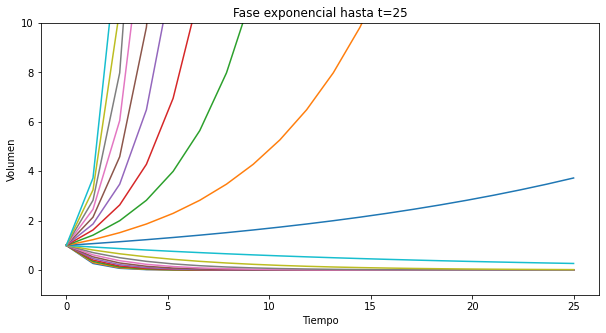

<Figure size 432x288 with 0 Axes>

In [91]:
t, a0, a1, V0, C1 =sp.symbols('t a0 a1 V0 C1')
plt.figure(figsize =(10,5))

t2 = np.linspace(0,25,20)

V1 = 1*sp.exp(a0*t)

for ini in np.linspace(-1, 1, 20):
    solp_e = sp.lambdify(t, V1.subs({a0:ini}))
    plt.plot(t2, solp_e(t2))

#  Ponemos título a los ejes
plt.xlabel('Tiempo')
plt.ylabel('Volumen')
plt.title('Fase lineal para t>25')
plt.ylim(-1,10)
plt.title('Fase exponencial hasta t=25')

plt.show()
plt.savefig('ModeloExpLin_E.jpg')

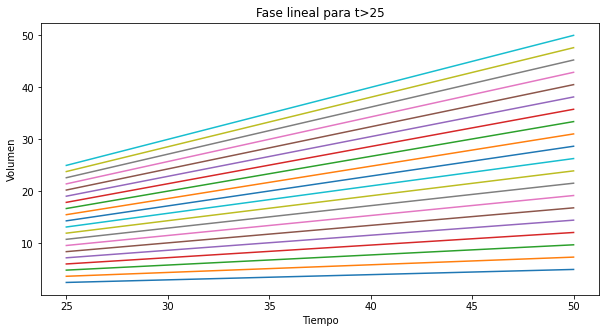

<Figure size 432x288 with 0 Axes>

In [92]:
t, a0, a1, V0, C1 =sp.symbols('t a0 a1 V0 C1')
plt.figure(figsize =(10,5))

# Generamos los valores de la variable independiente
t1 = np.linspace(25, 50, 20)

V = a1*t + (sp.log(a1/a0))/a0

for ini in np.linspace(0.1, 1, 20):
    solp_l = sp.lambdify(t, V.subs({a0:ini, a1:ini}))
    plt.plot(t1, solp_l(t1))

#  Ponemos título a los ejes
plt.xlabel('Tiempo')
plt.ylabel('Volumen')
plt.title('Fase lineal para t>25')

# Mostramos la figura
plt.show()
plt.savefig("ModeloExpLin_L.jpg")